In [1]:
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from   sklearn.ensemble import (
    AdaBoostClassifier, BaggingClassifier, RandomForestClassifier)
from   sklearn.tree import DecisionTreeClassifier

%matplotlib inline

In [2]:
churn = pd.read_csv('../churnTutorial/merged_2019-07-26.csv')

# Keep just the first few columns only
FIELDS = list(churn)[1:13]
keep = FIELDS + ['renewed']
churn = churn[keep]
print(churn.shape)
churn.head()

(63231, 13)


,cost,subscription_days,total_users,active_users,total_minutes,courses,mobile_users,mobile_minutes,n_exams,exam_member,n_vlab,vlab_member,renewed
0,999.00,566,1,1,1141,3,1,899,1,1,0,0,0
1,2693.10,365,3,4,3124,10,1,68,3,3,0,0,0
2,999.00,566,1,1,460,3,1,358,0,0,0,0,0
3,12103.72,365,14,12,3905,37,2,38,2,2,3,3,0
4,2693.10,365,3,4,3384,14,1,68,3,3,2,1,0


In [3]:
N_TEST = 6000
test_rows = np.random.choice(range(churn.shape[0]), size=N_TEST)
test = churn.iloc[test_rows]
churn.drop(test_rows, inplace=True)
print(churn.shape, test.shape)

(57477, 13) (6000, 13)


In [4]:
Xy = churn
X_test = test[FIELDS]
y_test = test.renewed
(Xy.shape), (X_test.shape, y_test.shape)

((57477, 13), ((6000, 12), (6000,)))

### Simple Ensemble Methods:
- Majority Rule
- Weighted Majority Rule

### Bagging (< 'bootstrapped aggregating')
Or just "bootstrapping" in the pre-ML days....


`TODO:`
Write code that does the following:
- Samples random subsets of the data _with replacement_ (e.g., some records may appear multiple times; others not at all
- Fit a tree model to the data (to keep it simple limit to max_depth=MAX_DEPTH)
- Save the predictions and accuracy
- Repeat 20 times
- "Final" predictions will be the majority rule... determine and see how this compares to a single tree on the full data set

- `np.random.choice()`:
  - https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.choice.html

In [5]:
MAX_DEPTH = 10 # Leave this for now.... feel free to play with it later

Some brief hints:

In [6]:
# Sampling with replacement:
inds = range(10)
np.random.choice(inds, size=10, replace=True)

array([7, 9, 9, 4, 9, 1, 2, 6, 2, 9])

In [7]:
# Slicing DataFrames
toy_df = pd.DataFrame({'a': ['abominations', 'are', 'always', 'anathama'],
                       'b': [2.2, 3.3, 4.4, 5.5],
                       'c': [1, 2, 3, 4]})
toy_df

,a,b,c
0,abominations,2.2,1
1,are,3.3,2
2,always,4.4,3
3,anathama,5.5,4


In [8]:
toy_df.loc[toy_df.b > 4, ['a', 'c']]

,a,c
2,always,3
3,anathama,4


In [9]:
toy_df.iloc[[1, 2], :]

,a,b,c
1,are,3.3,2
2,always,4.4,3


In [ ]:
def get_bootstrapped_sample(df, n_records=None):
    '''
    Return a DataFrame with <n_records> rows, that are a random 
    resampling of <df> with replacement
    '''
    data = df.copy() 
    n_records = n_records or data.shape[0] 
    # TO DO...
    sample = None # update
    #=====================
    
    X = sample[FIELDS]
    y = sample.renewed
    return X, y

In [11]:
# Test
sample_X, sample_y = get_bootstrapped_sample(Xy)
sample_X.head()

,cost,subscription_days,total_users,active_users,total_minutes,courses,mobile_users,mobile_minutes,n_exams,exam_member,n_vlab,vlab_member
10507,2693.1,365,3,3,2035,11,2,211,0,0,0,0
6249,2693.1,694,3,2,1573,4,1,27,0,0,0,0
12809,2693.1,365,3,2,792,5,0,0,0,0,0,0
23264,999.0,377,1,1,453,19,1,196,1,1,2,1
15556,999.0,668,1,1,1993,15,1,1484,1,1,0,0


In [ ]:
def get_accuracy(preds, target):
    '''
    <preds> and <target> are pd.Series (array-like objects) of 0s and 1s
    This should return the fraction of values that are the same in both
    '''
    # TO DO
    accuracy = None # update
    #=====================
    
    return accuracy

In [13]:
# Test
a = np.array([0, 1, 0, 0, 1, 0, 1, 1])
b = np.array([0, 0, 1, 1, 0, 0, 1, 1])
get_accuracy(a, b)

0.5

In [ ]:
def get_predictions(X, y, X_test, y_test, max_depth=MAX_DEPTH):
    # Create your classifier
    
    # Train on X, y
    
    # Predict on X_test
    preds = None
    
    # Get Accuracy
    accuracy = None
    #=====================
    
    return {'preds': preds, 'acc': accuracy}

In [15]:
# Test
X_samp, y_samp = get_bootstrapped_sample(Xy)
get_predictions(X_samp, y_samp, X_test, y_test, max_depth=MAX_DEPTH)

{'preds': array([1, 1, 1, ..., 1, 1, 1]), 'acc': 0.679}

### My Solutions....

In [10]:
def get_bootstrapped_sample(df, n_records=None):
    data = df.copy()
    n_records = n_records or data.shape[0] 
    inds = np.random.choice(
        range(data.shape[0]), size=n_records, replace=True)
    sample = data.iloc[inds, :]
    X = sample[FIELDS]
    y = sample.renewed
    return X, y

In [12]:
def get_accuracy(preds, target):
    n = len(preds)
    accuracy = (preds == target).sum() / n
    return accuracy

In [14]:
def get_predictions(X, y, X_test, y_test, **kwargs):
    tree = DecisionTreeClassifier(**kwargs)
    tree.fit(X, y)
    preds = tree.predict(X_test)
    acc = get_accuracy(preds, y_test)
    return {'preds': preds, 'acc': acc}

In [ ]:
# Test
a = np.array([0, 1, 0, 0, 1, 0, 1, 1])
b = np.array([0, 0, 1, 1, 0, 0, 1, 1])
get_accuracy(a, b)

In [ ]:
# Test
X_samp, y_samp = get_bootstrapped_sample(Xy)
get_predictions(X_samp, y_samp, X_test, y_test, max_depth=MAX_DEPTH)

In [16]:
# Now make 20 such runs
N_BOOT = 21
all_preds = []
all_acc = []

for i in range(N_BOOT):
    print(f'Estimator {i + 1}', end='\r')
    X_samp, y_samp = get_bootstrapped_sample(Xy)
    output = get_predictions(
        X_samp, y_samp, X_test, y_test, max_depth=MAX_DEPTH)
    all_preds.append(output['preds'])
    all_acc.append(output['acc'])

In [17]:
pred_df = pd.DataFrame(data=all_preds)
print(pred_df.shape)
pred_df.head()

(21, 6000)


,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
0,1,1,1,1,1,1,1,0,0,0,...,0,0,0,1,1,1,0,1,1,1
1,1,1,1,1,1,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,0,1,1,...,0,0,1,1,1,1,0,0,1,1
3,1,1,1,1,1,0,1,0,1,0,...,0,1,1,0,1,1,0,1,1,1
4,1,1,1,1,1,1,1,0,1,0,...,0,0,1,1,1,1,0,1,1,1


In [18]:
majority_preds = 1 * (pred_df.sum() / N_BOOT > 0.5)
majority_preds

0       1
1       1
2       1
3       1
4       1
       ..
5995    1
5996    0
5997    1
5998    1
5999    1
Length: 6000, dtype: int64

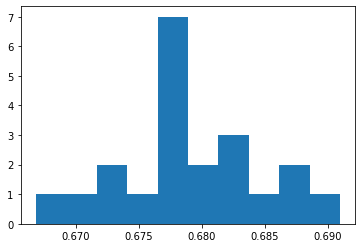

In [19]:
plt.hist(all_acc);

In [20]:
get_accuracy(majority_preds.to_list(), y_test)

0.7061666666666667

In [21]:
# Compare with non-bootstrapped method:
X_train = Xy[FIELDS]
y_train = Xy.renewed
tree = DecisionTreeClassifier(max_depth=MAX_DEPTH)
tree.fit(X_train, y_train)
preds = tree.predict(X_test)
get_accuracy(preds, y_test)

0.6886666666666666

Fortunately, sklearn makes this simple:

In [22]:
start = time.time()
bagger = BaggingClassifier(DecisionTreeClassifier(max_depth=MAX_DEPTH), 
                           n_estimators=N_BOOT, 
                           max_samples=X_train.shape[0], 
                           bootstrap=True)
bagger.fit(X_train, y_train)
preds = bagger.predict(X_test)
print('Acc:', get_accuracy(preds, y_test))
print('Time:', time.time() - start)

Acc: 0.74
Time: 2.3933069705963135


### Random Forests

In it's most basic form, a Random Forest model is simply bootstrapping/bagging applied to a Tree model.  However, sklearn offers a different class for it that is optimized for trees (which the `BaggingClassifier` is not).

In [23]:
start = time.time()
forest = RandomForestClassifier(n_estimators=N_BOOT, max_depth=MAX_DEPTH)
forest.fit(X_train, y_train)
preds = forest.predict(X_test)
print('Acc:', get_accuracy(preds, y_test))
print('Time:', time.time() - start)

Acc: 0.7125
Time: 0.782916784286499


...but often when people refer to Random Forest models they may (also) be referring to "boosting".  Boosting still uses the bagging/bootstrapping method, but each sequential estimator attempts to learn from the errors of the previous estimator.  That is the weighting of the errors gets "boosted" on sequential runs.  The most frequently used method is the AdaBoost algorithm.  

In AdaBoost, all weights are set to 1/m (where m is the number of samples in your data set).  Then, for each estimator, the error rate <i>r<sub>j</sub></i> is computed as:

$$r_j = \frac{\sum \limits _{i=1, \hat{y}^{(i)}≠y^{(i)}} ^m w^{(i)}}{\sum \limits _{i=1} ^m w^{(i)}}$$

...or, in plain English, the sum of the weights of the wrong assignments divided by the sum of all weights.

That predictor's weight <i>&alpha;<sub>j</sub></i> is then computed as

$$\alpha_j = \eta log \frac{1 - r_j}{r_j}$$

where <i>&eta;</i> is the "learning rate" hyperparameter to be tuned (defaults to 1).  In simple terms, though, the more correct an estimator is, the higher its weight is set. (<i>&alpha;</i> tends to +inf with fewer mistakes; = 0 if half wrong; tend toward -inf with more mistakes.)

Finally, weights on each record get updated:
for <i>i</i> = 1, 2, ..., <i>m</i>

$$w^{(i)} \leftarrow w^{(i)}$$ if correctly predicted, else
$$w^{(i)} \leftarrow w^{(i)}exp(\alpha_j)$$

...and weights are normalized. Again, in simple terms, the more times a record is misclassified, the higher its weight becomes.

Let's simulate this process:

In [24]:
ETA = 0.1
M = 10
df = pd.DataFrame({'w0': [1/M] * M})
df

,w0
0,0.1
1,0.1
2,0.1
3,0.1
4,0.1
5,0.1
6,0.1
7,0.1
8,0.1
9,0.1


In [25]:
def calculate_weights(df, mod_err, weights=0):
    errs = f'mod{weights+1}_err'
    df[errs] = mod_err
    r = np.dot(df[f'w{weights}'], df[errs]) / df[f'w{weights}'].sum()
    alpha = ETA * np.log((1 - r) / r)
    print(f'Model weight (alpha): {alpha:.4f}')
    w = df[f'w{weights}'].copy()
    w[df[errs] == 1] = w[df[errs] == 1] * np.exp(alpha)
    df[f'w{weights + 1}'] = w / w.sum()
    return df

In [26]:
mod1_err = [1, 0, 1, 1, 0, 0, 0, 0, 0, 1]
df = calculate_weights(df, mod1_err, weights=0)
df

Model weight (alpha): 0.0405


,w0,mod1_err,w1
0,0.1,1,0.102442
1,0.1,0,0.098372
2,0.1,1,0.102442
3,0.1,1,0.102442
4,0.1,0,0.098372
5,0.1,0,0.098372
6,0.1,0,0.098372
7,0.1,0,0.098372
8,0.1,0,0.098372
9,0.1,1,0.102442


In [27]:
mod2_err = [0, 0, 1, 1, 0, 0, 1, 0, 0, 0]
df = calculate_weights(df, mod2_err, weights=1)
df

Model weight (alpha): 0.0832


,w0,mod1_err,w1,mod2_err,w2
0,0.1,1,0.102442,0,0.099817
1,0.1,0,0.098372,0,0.095850
2,0.1,1,0.102442,1,0.108475
3,0.1,1,0.102442,1,0.108475
4,0.1,0,0.098372,0,0.095850
5,0.1,0,0.098372,0,0.095850
6,0.1,0,0.098372,1,0.104165
7,0.1,0,0.098372,0,0.095850
8,0.1,0,0.098372,0,0.095850
9,0.1,1,0.102442,0,0.099817


In [28]:
mod3_err = [0, 0, 1, 0, 0, 0, 0, 0, 0, 1]
df = calculate_weights(df, mod3_err, weights=2)
df

Model weight (alpha): 0.1335


,w0,mod1_err,w1,mod2_err,w2,mod3_err,w3
0,0.1,1,0.102442,0,0.099817,0,0.096933
1,0.1,0,0.098372,0,0.095850,0,0.093081
2,0.1,1,0.102442,1,0.108475,1,0.120389
3,0.1,1,0.102442,1,0.108475,0,0.105341
4,0.1,0,0.098372,0,0.095850,0,0.093081
5,0.1,0,0.098372,0,0.095850,0,0.093081
6,0.1,0,0.098372,1,0.104165,0,0.101155
7,0.1,0,0.098372,0,0.095850,0,0.093081
8,0.1,0,0.098372,0,0.095850,0,0.093081
9,0.1,1,0.102442,0,0.099817,1,0.110779


In [ ]:
# NOTE that in the case of a perfect predictor, weights do not update, and
# model's weight is infinite.  Not exactly sure how sklearn handles this 
# case as it may not always be desirable to put all the weight of the 
# final preds (see below) on a single model

#mod4_err = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#df_inf = calculate_weights(df, mod4_err, weights=3)
#df_inf

How extreme the differences are depends on ETA (try, e.g., ETA=0.5)

Final predictions from the Boosted model then takes the sum of each model's predictions weighted by that models weight.

In [29]:
m1_w = 0.0405
m2_w = 0.0832
m3_w = 0.1335

# Normalize
tot = m1_w + m2_w + m3_w
m1_w /= tot
m2_w /= tot
m3_w /= tot

m1_w, m2_w, m3_w

(0.15746500777604977, 0.3234836702954899, 0.5190513219284604)

In [30]:
df = pd.DataFrame({'y':     [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
                   'pred1': [1, 0, 1, 1, 0, 1, 1, 1, 1, 0],
                   'pred2': [0, 0, 1, 1, 0, 1, 0, 1, 1, 1],
                   'pred3': [0, 0, 1, 0, 0, 1, 1, 1, 1, 0],})
df

,y,pred1,pred2,pred3
0,0,1,0,0
1,0,0,0,0
2,0,1,1,1
3,0,1,1,0
4,0,0,0,0
5,1,1,1,1
6,1,1,0,1
7,1,1,1,1
8,1,1,1,1
9,1,0,1,0


In [31]:
df['pred1_w'] = df.pred1 * m1_w
df['pred2_w'] = df.pred2 * m2_w
df['pred3_w'] = df.pred3 * m3_w
df['pred_prob'] = df.pred1_w + df.pred2_w + df.pred3_w
df['pred'] = round(df.pred_prob).astype(int)
df

,y,pred1,pred2,pred3,pred1_w,pred2_w,pred3_w,pred_prob,pred
0,0,1,0,0,0.157465,0.000000,0.000000,0.157465,0
1,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0
2,0,1,1,1,0.157465,0.323484,0.519051,1.000000,1
3,0,1,1,0,0.157465,0.323484,0.000000,0.480949,0
4,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0
5,1,1,1,1,0.157465,0.323484,0.519051,1.000000,1
6,1,1,0,1,0.157465,0.000000,0.519051,0.676516,1
7,1,1,1,1,0.157465,0.323484,0.519051,1.000000,1
8,1,1,1,1,0.157465,0.323484,0.519051,1.000000,1
9,1,0,1,0,0.000000,0.323484,0.000000,0.323484,0


Again, `sklearn` makes our lives easier:

In [32]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=MAX_DEPTH), 
                             n_estimators=N_BOOT, 
                             learning_rate=ETA)
ada.fit(X_train, y_train)
preds = ada.predict(X_test)
acc = get_accuracy(preds, y_test)
acc

0.8758333333333334

Tune your learning rate hyperparameter.
_NOTE:_ normally you would use your validation set for this, not your test set, so excuse my laziness...

In [33]:
etas = np.linspace(0.01, 1, 10)
accs = []

for eta in etas:
    print(f'Fitting with eta = {eta:.2f}...', end='\r')
    ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=MAX_DEPTH), 
                             n_estimators=N_BOOT, 
                             learning_rate=eta)
    ada.fit(X_train, y_train)
    preds = ada.predict(X_test)
    acc = get_accuracy(preds, y_test)
    accs.append(acc)

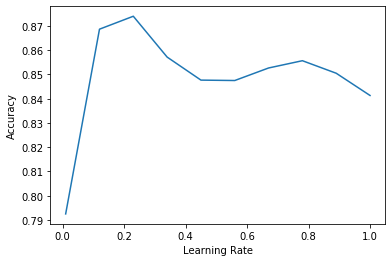

In [34]:
plt.plot(etas, accs)
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy');

Note that, in principle, AdaBoost can be used with any type of classifier, or (with some adjustments to the weighting scheme), even regressors.  In practice though, it is most commonly used with tree models, and other forms of regularization are used with other models.